In [1]:
%load_ext autoreload
%autoreload 2

import os
import sys
sys.path.append(os.path.dirname(os.getcwd()))

from common import *
from ydj.analysis_tools import *

# 1. Load dataset

In [2]:
data = pd.read_csv(join(PATH.input, 'train_data.csv'))
print(len(data))
data.head()

3859200


TurbID  Day Tmstamp  Wspd  Wdir   Etmp   Itmp   Ndir  Pab1  Pab2  Pab3  Prtv    Patv
0       1    1   00:00   NaN   NaN    NaN    NaN    NaN   NaN   NaN   NaN   NaN     NaN
1       1    1   00:10  6.17 -3.99  30.73  41.80  25.92   1.0   1.0   1.0 -0.25  494.66
2       1    1   00:20  6.27 -2.18  30.60  41.63  20.91   1.0   1.0   1.0 -0.24  509.76
3       1    1   00:30  6.42 -0.73  30.52  41.52  20.91   1.0   1.0   1.0 -0.26  542.53
4       1    1   00:40  6.25  0.89  30.49  41.38  20.91   1.0   1.0   1.0 -0.23  509.36

# 2. Preprocessing

## 1) Generate `Time`

In [3]:
%%time
data = generate_full_timestamp(data)
data = impute_data(data)
data.head()

Number of Nan values: 0
CPU times: user 12.5 s, sys: 404 ms, total: 13 s
Wall time: 9.71 s


TurbID  Day Tmstamp  Wspd  Wdir   Etmp   Itmp   Ndir  Pab1  Pab2  Pab3  Prtv    Patv  \
0       1    1   00:00  6.17 -3.99  30.73  41.80  25.92   1.0   1.0   1.0 -0.25  494.66   
1       1    1   00:10  6.17 -3.99  30.73  41.80  25.92   1.0   1.0   1.0 -0.25  494.66   
2       1    1   00:20  6.27 -2.18  30.60  41.63  20.91   1.0   1.0   1.0 -0.24  509.76   
3       1    1   00:30  6.42 -0.73  30.52  41.52  20.91   1.0   1.0   1.0 -0.26  542.53   
4       1    1   00:40  6.25  0.89  30.49  41.38  20.91   1.0   1.0   1.0 -0.23  509.36   

   Time_in_day  Time  
0            1     1  
1            2     2  
2            3     3  
3            4     4  
4            5     5

## 2) Feature engineering

In [4]:
%%time
data_proc = preprocess(data)
data_proc

CPU times: user 2.08 s, sys: 512 ms, total: 2.6 s
Wall time: 1.79 s


TurbID  Day Tmstamp  Wspd  Wdir   Etmp   Itmp    Ndir  Pab1  Pab2  Pab3    Prtv    Patv  \
0             1    1   00:00  6.17 -3.99  30.73  41.80   25.92  1.00  1.00  1.00   -0.25  494.66   
1             1    1   00:10  6.17 -3.99  30.73  41.80   25.92  1.00  1.00  1.00   -0.25  494.66   
2             1    1   00:20  6.27 -2.18  30.60  41.63   20.91  1.00  1.00  1.00   -0.24  509.76   
3             1    1   00:30  6.42 -0.73  30.52  41.52   20.91  1.00  1.00  1.00   -0.26  542.53   
4             1    1   00:40  6.25  0.89  30.49  41.38   20.91  1.00  1.00  1.00   -0.23  509.36   
...         ...  ...     ...   ...   ...    ...    ...     ...   ...   ...   ...     ...     ...   
3859195     134  200   23:10  4.86  4.68   9.04  10.40  174.39  0.01  0.01  0.01 -108.13  308.65   
3859196     134  200   23:20  4.46 -4.00   8.79  10.33  179.76  0.01  0.01  0.01  -93.64  221.60   
3859197     134  200   23:30  4.23 -0.08   8.74  10.22  172.35  0.01  0.01  0.01 -111.20  220.60   
3859198     134  200   23:40  4.36 -6.12   8.64  10.10  172.35  0.01  0.01  0.01 -108.04  222.15   
3859199     134  200   23:50  4.79 -3.65   8.53  10.01  168.58  0.01  0.01  0.01 -119.76  264.17   

         Time_in_day   Time          X           Y  Etmp_abs  Wdir_adj  Wspd_cos        RPM  \
0                  1      1  3349.8515  5939.23193    273.88     21.93  6.155045  16.034441   
1                  2      2  3349.8515  5939.23193    273.88     21.93  6.155045  16.034441   
2                  3      3  3349.8515  5939.23193    273.75     18.73  6.265462  16.322087   
3                  4      4  3349.8515  5939.23193    273.67     20.18  6.419479  16.723314   
4                  5      5  3349.8515  5939.23193    273.64     21.80  6.249246  16.279842   
...              ...    ...        ...         ...       ...       ...       ...        ...   
3859195          140  28796    11.3385  6713.46517    252.19    179.07  4.843796  13.300998   
3859196          141  28797    11.3385  6713.46517    251.94    175.76  4.449136  12.217265   
3859197          142  28798    11.3385  6713.46517    251.89    172.27  4.229996  11.615510   
3859198          143  28799    11.3385  6713.46517    251.79    166.23  4.335151  11.904266   
3859199          144  28800    11.3385  6713.46517    251.68    164.93  4.780284  13.126593   

          Wspd_cube     P_max  
0        233.181313  0.857621  
1        233.181313  0.857621  
2        245.957079  0.900427  
3        264.544863  0.966892  
4        244.052275  0.892196  
...             ...       ...  
3859195  113.646913  0.455178  
3859196   88.069787  0.352134  
3859197   75.686746  0.300476  
3859198   81.472834  0.329171  
3859199  109.234802  0.436675  

[3801312 rows x 23 columns]

In [5]:
data_proc = data_proc[list(data_proc.columns.drop(['Patv', 'Tmstamp', 'X', 'Y', 'Etmp_abs'])) + ['Patv']]
data_proc

TurbID  Day  Wspd  Wdir   Etmp   Itmp    Ndir  Pab1  Pab2  Pab3    Prtv  Time_in_day  \
0             1    1  6.17 -3.99  30.73  41.80   25.92  1.00  1.00  1.00   -0.25            1   
1             1    1  6.17 -3.99  30.73  41.80   25.92  1.00  1.00  1.00   -0.25            2   
2             1    1  6.27 -2.18  30.60  41.63   20.91  1.00  1.00  1.00   -0.24            3   
3             1    1  6.42 -0.73  30.52  41.52   20.91  1.00  1.00  1.00   -0.26            4   
4             1    1  6.25  0.89  30.49  41.38   20.91  1.00  1.00  1.00   -0.23            5   
...         ...  ...   ...   ...    ...    ...     ...   ...   ...   ...     ...          ...   
3859195     134  200  4.86  4.68   9.04  10.40  174.39  0.01  0.01  0.01 -108.13          140   
3859196     134  200  4.46 -4.00   8.79  10.33  179.76  0.01  0.01  0.01  -93.64          141   
3859197     134  200  4.23 -0.08   8.74  10.22  172.35  0.01  0.01  0.01 -111.20          142   
3859198     134  200  4.36 -6.12   8.64  10.10  172.35  0.01  0.01  0.01 -108.04          143   
3859199     134  200  4.79 -3.65   8.53  10.01  168.58  0.01  0.01  0.01 -119.76          144   

          Time  Wdir_adj  Wspd_cos        RPM   Wspd_cube     P_max    Patv  
0            1     21.93  6.155045  16.034441  233.181313  0.857621  494.66  
1            2     21.93  6.155045  16.034441  233.181313  0.857621  494.66  
2            3     18.73  6.265462  16.322087  245.957079  0.900427  509.76  
3            4     20.18  6.419479  16.723314  264.544863  0.966892  542.53  
4            5     21.80  6.249246  16.279842  244.052275  0.892196  509.36  
...        ...       ...       ...        ...         ...       ...     ...  
3859195  28796    179.07  4.843796  13.300998  113.646913  0.455178  308.65  
3859196  28797    175.76  4.449136  12.217265   88.069787  0.352134  221.60  
3859197  28798    172.27  4.229996  11.615510   75.686746  0.300476  220.60  
3859198  28799    166.23  4.335151  11.904266   81.472834  0.329171  222.15  
3859199  28800    164.93  4.780284  13.126593  109.234802  0.436675  264.17  

[3801312 rows x 19 columns]

# 3. Get correlation

In [6]:
d = data_proc[data_proc['TurbID'] == 1]
d.drop(columns=['TurbID'], inplace=True)
d

Day  Wspd  Wdir   Etmp   Itmp    Ndir  Pab1  Pab2  Pab3  Prtv  Time_in_day   Time  \
0        1  6.17 -3.99  30.73  41.80   25.92  1.00  1.00  1.00 -0.25            1      1   
1        1  6.17 -3.99  30.73  41.80   25.92  1.00  1.00  1.00 -0.25            2      2   
2        1  6.27 -2.18  30.60  41.63   20.91  1.00  1.00  1.00 -0.24            3      3   
3        1  6.42 -0.73  30.52  41.52   20.91  1.00  1.00  1.00 -0.26            4      4   
4        1  6.25  0.89  30.49  41.38   20.91  1.00  1.00  1.00 -0.23            5      5   
...    ...   ...   ...    ...    ...     ...   ...   ...   ...   ...          ...    ...   
28795  200  4.70 -0.04  10.46  27.67  201.38  0.99  0.99  0.99 -0.29          140  28796   
28796  200  3.53 -2.37  11.32  28.65  191.85  0.99  0.99  0.99 -0.22          141  28797   
28797  200  3.50 -0.65  11.81  29.29  187.51  0.99  0.99  0.99 -0.24          142  28798   
28798  200  4.26  0.50  10.08  28.13  187.51  0.99  0.99  0.99 -0.28          143  28799   
28799  200  3.97  0.92  10.96  28.46  191.23  0.99  0.99  0.99 -0.27          144  28800   

       Wdir_adj  Wspd_cos        RPM   Wspd_cube     P_max    Patv  
0         21.93  6.155045  16.034441  233.181313  0.857621  494.66  
1         21.93  6.155045  16.034441  233.181313  0.857621  494.66  
2         18.73  6.265462  16.322087  245.957079  0.900427  509.76  
3         20.18  6.419479  16.723314  264.544863  0.966892  542.53  
4         21.80  6.249246  16.279842  244.052275  0.892196  509.36  
...         ...       ...        ...         ...       ...     ...  
28795    201.34  4.699999  12.250306  103.822924  0.409381  296.34  
28796    189.48  3.526981   9.192894   43.874197  0.172857  178.46  
28797    186.86  3.499775   9.121983   42.866724  0.168164  164.19  
28798    188.01  4.259838  11.103049   77.299945  0.305291  259.42  
28799    192.15  3.969488  10.346267   62.546578  0.246235  218.70  

[28368 rows x 18 columns]

In [9]:
from analysis_tools.eda import *
plt.style.use('ggplot')

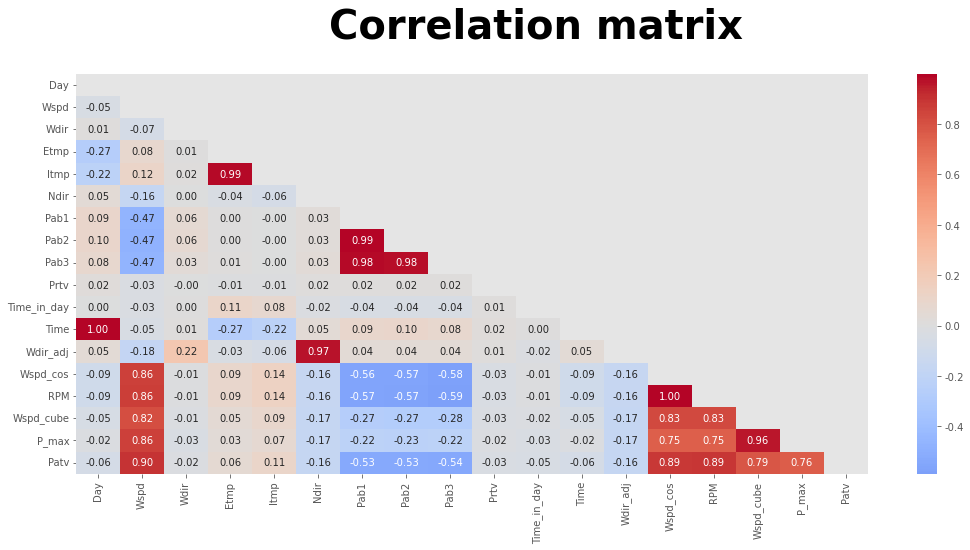

In [10]:
plot_corr(d.corr(), figsize=(15, 8))

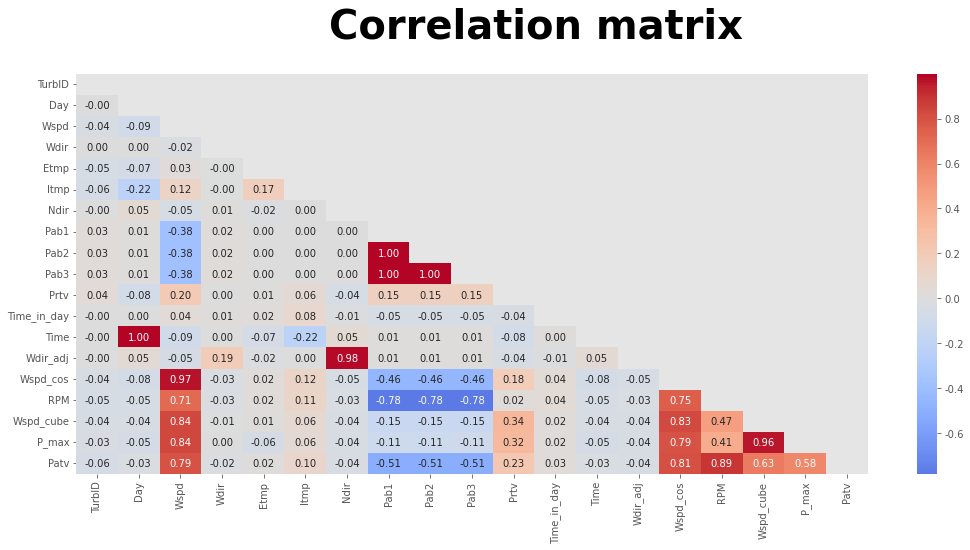

In [11]:
plot_corr(data_proc.corr(), figsize=(15, 8))

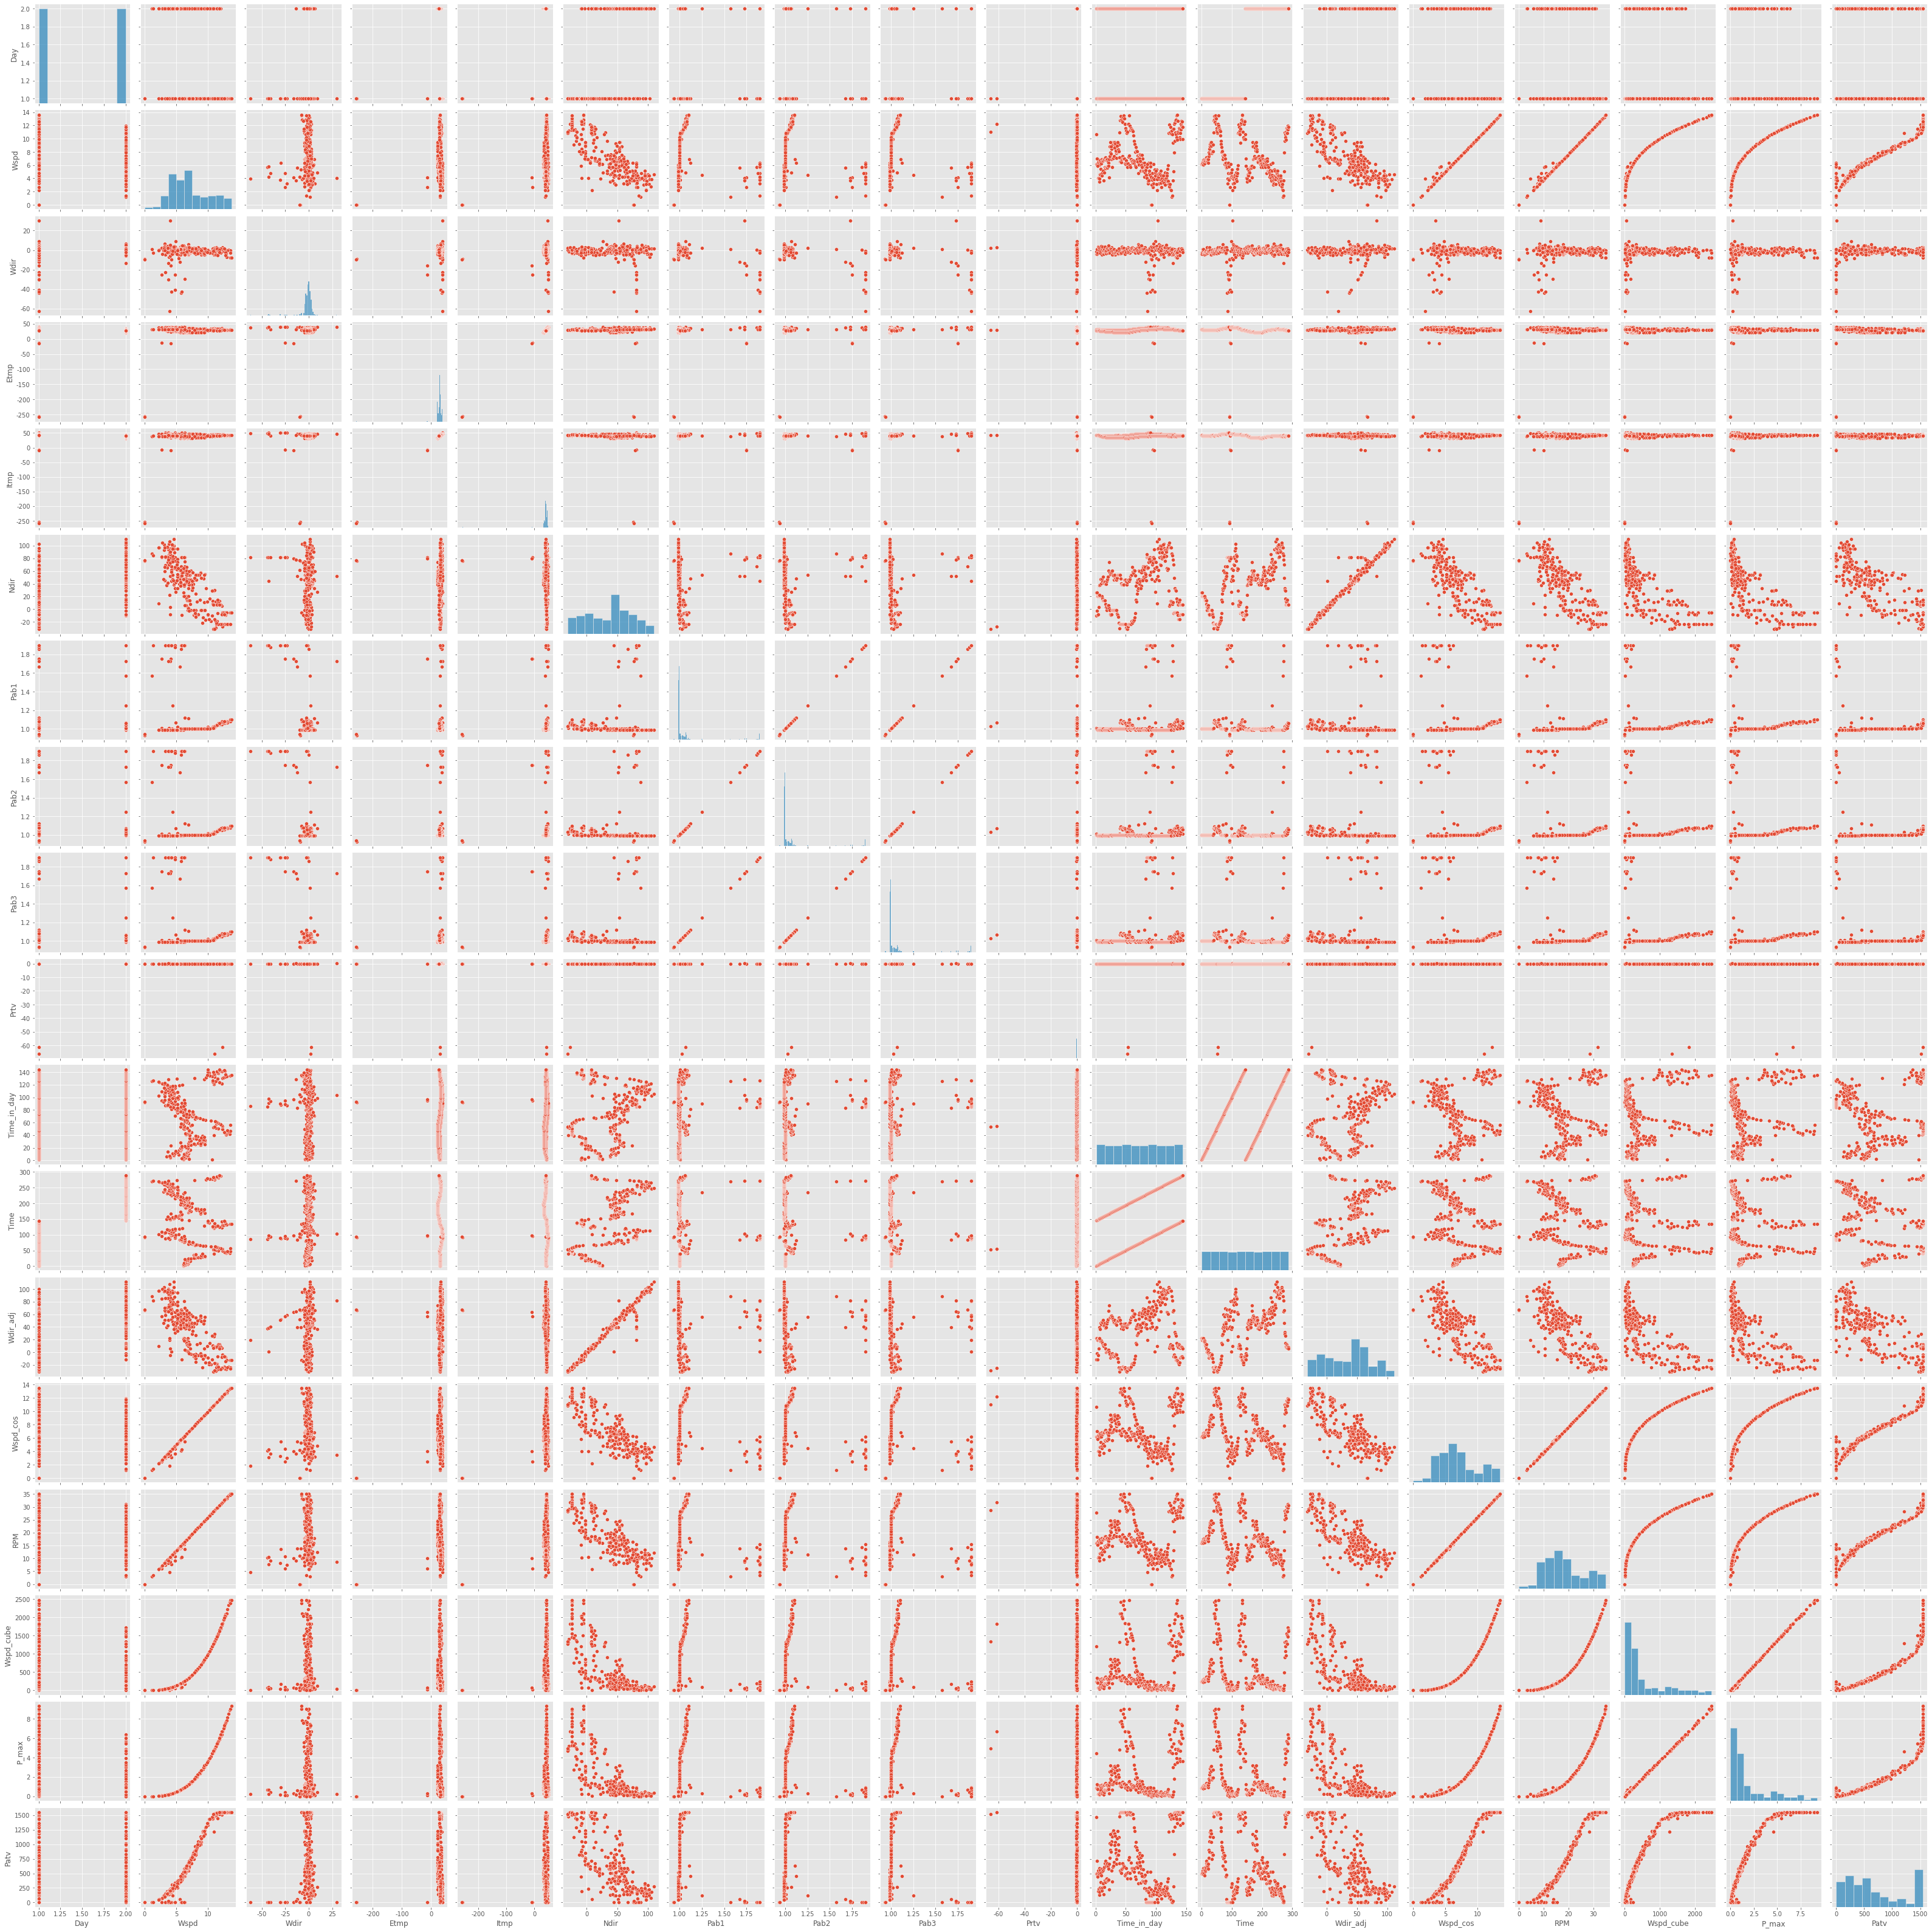

In [12]:
%%time
sns.pairplot(d.iloc[:288])

CPU times: user 23.5 s, sys: 268 ms, total: 23.8 s
Wall time: 23.5 s


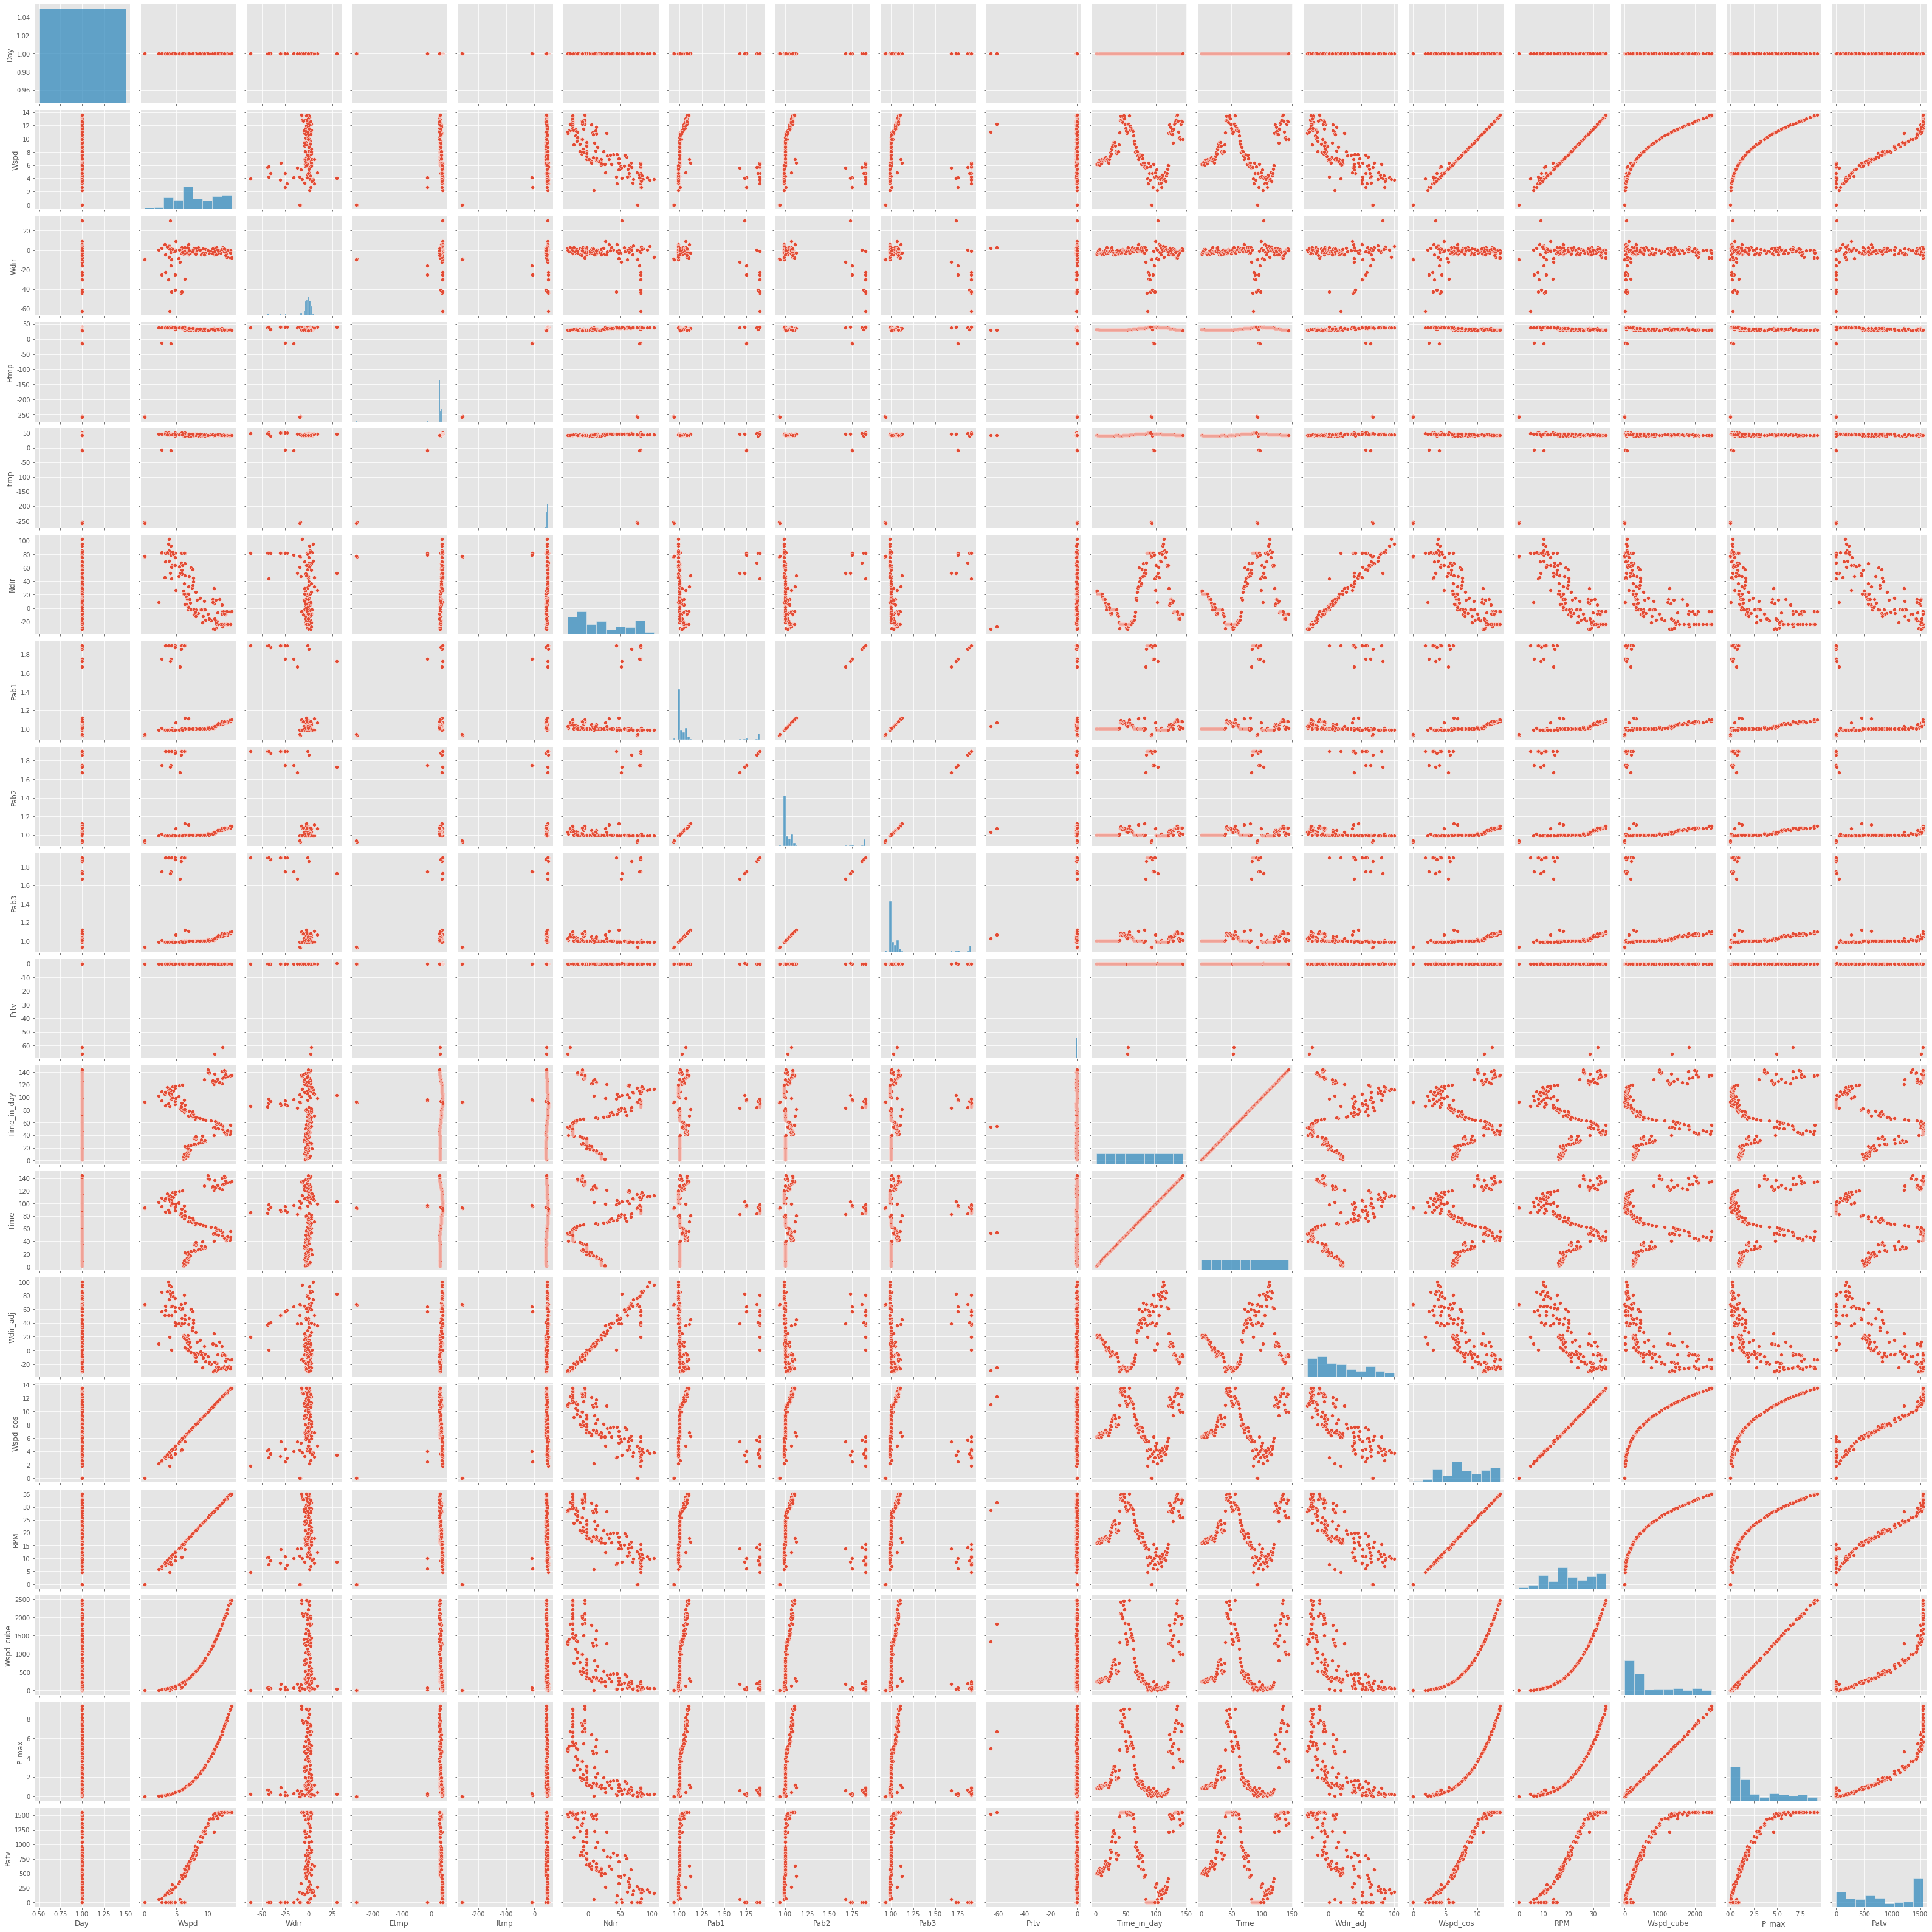

In [13]:
%%time
sns.pairplot(d.iloc[:144])

CPU times: user 27.7 s, sys: 336 ms, total: 28.1 s
Wall time: 27.8 s


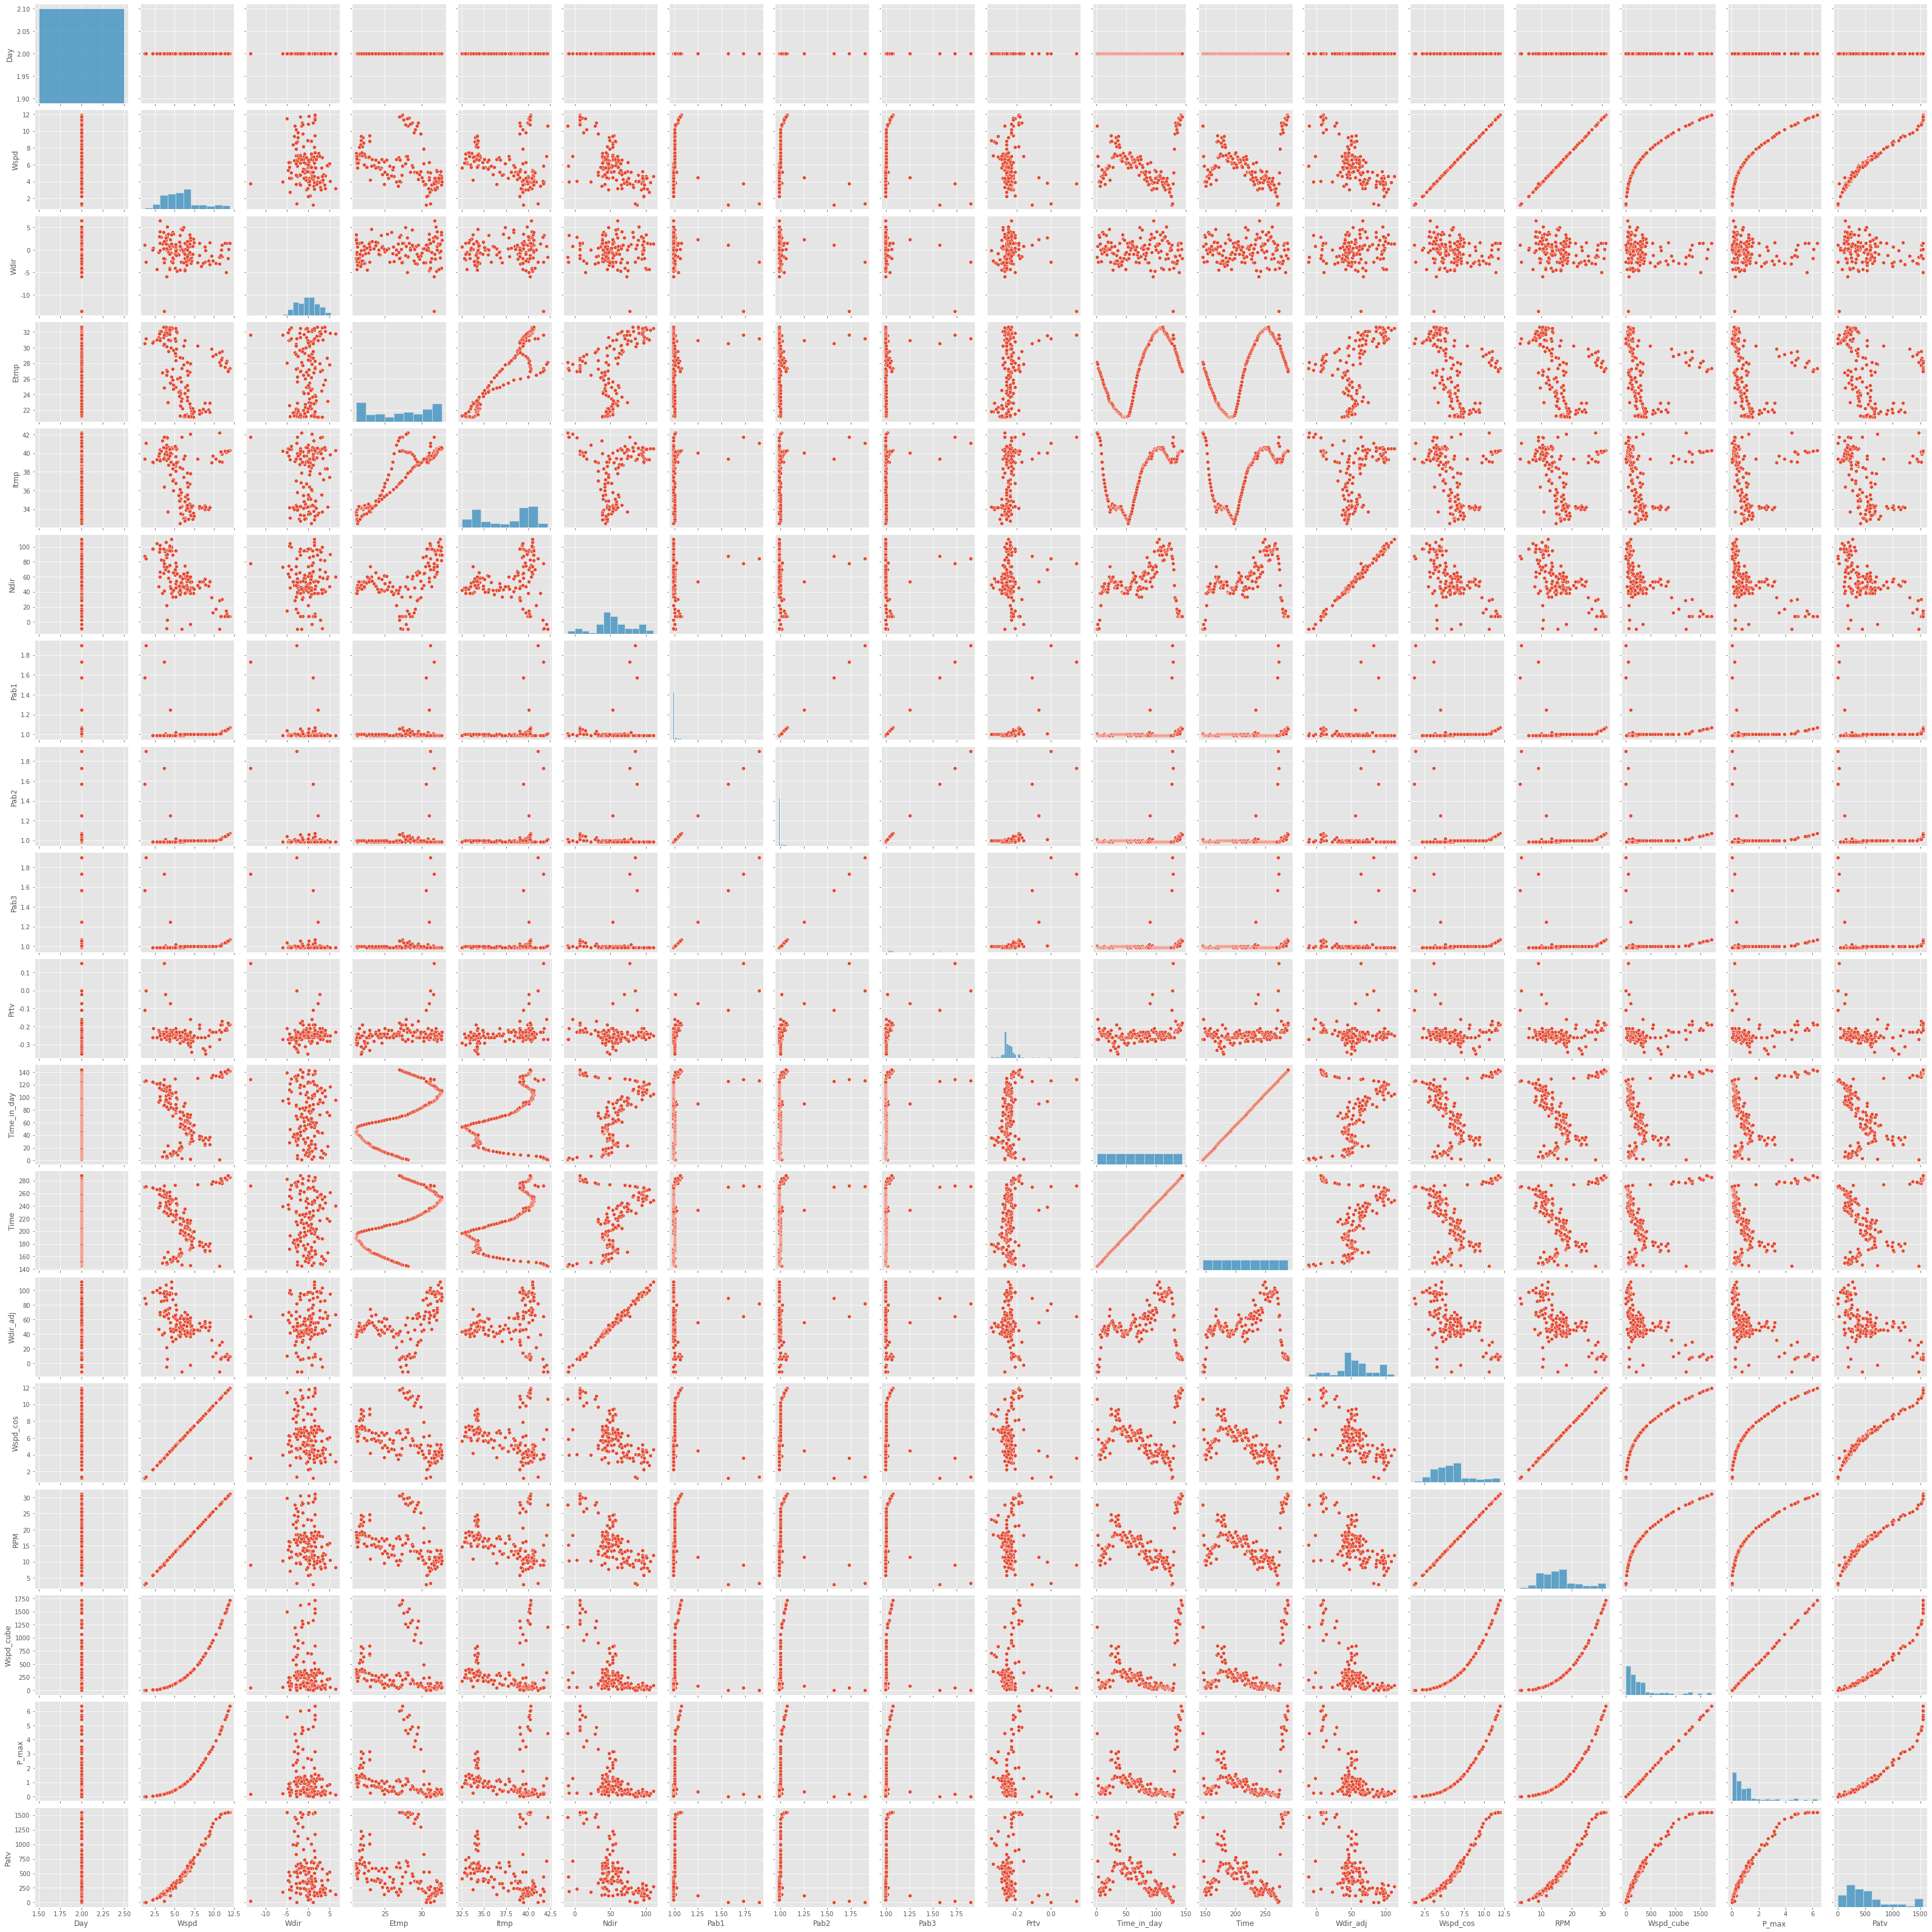

In [14]:
%%time
sns.pairplot(d.iloc[144:288])

# 4. Time series analysis

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
import statsmodels.api as sm
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.statespace.sarimax import SARIMAX
# from pmdarima.arima import auto_arima
from statsmodels.tsa.arima.model import ARIMA

plt.style.use('ggplot')

In [ ]:
%%time
data = pd.read_csv(join(PATH.input, 'train_data.csv'))
data = generate_full_timestamp(data)
data = impute_data(data)
data = preprocess(data)

In [ ]:
data = data[['TurbID', 'Day', 'Tmstamp', 'Patv']]
data

In [ ]:
%%time
data_tid = data[data['TurbID'] == 1]
data_tid['T'] = data_tid.apply(lambda row: pd.to_timedelta(f"{row['Day']} days {row['Tmstamp']}:00"), axis='columns')
data_tid

In [ ]:
d = data_tid.query("TurbID == 1 and Day <= 5")
d

In [ ]:
plt.style.use('ggplot')

In [ ]:
ax = d.set_index('T')['Patv'].plot(figsize=(20, 10))
plt.gcf().autofmt_xdate()

In [ ]:
%%time
from statsmodels.tsa.seasonal import seasonal_decompose

decomp = seasonal_decompose(d['Patv'], period=1)
fig = decomp.plot()
fig.set_size_inches((30, 10))
fig.tight_layout()

In [ ]:
%%time
from statsmodels.tsa.seasonal import seasonal_decompose

decomp = seasonal_decompose(d['Patv'], period=144)
fig = decomp.plot()
fig.set_size_inches((30, 10))
fig.tight_layout()

In [ ]:
train_data, test_data = train_test_split(d, test_size=144, shuffle=False)

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf, month_plot, quarter_plot

In [ ]:
%%time
fig, ax = plt.subplots(2, figsize=(30, 10))
plot_acf(train_data['Patv'], ax=ax[0], lags=30)
plot_pacf(train_data['Patv'], ax=ax[1], lags=30)

In [ ]:
diff_train_data = train_data['Patv'].diff()
diff_train_data = diff_train_data.dropna()

In [ ]:
fig, axes = plt.subplots(2, 1, figsize=(40, 10))
axes[0].plot(train_data['Patv'])
axes[1].plot(diff_train_data);

In [ ]:
%%time
fig, ax = plt.subplots(2, figsize=(30, 10))
plot_acf(diff_train_data, ax=ax[0], lags=30)
plot_pacf(diff_train_data, ax=ax[1], lags=30)

In [ ]:
# auto_arima_model = auto_arima(tmp, start_p=1, start_q=1, max_p=2, max_q=2,
#                               start_P=1, start_Q=1, max_P=2, max_Q=2, m=144, seasonal=True,
#                               d=1, D=1,
#                               trace=True,
#                               error_action='ignore',
#                               suppress_warnings=True,
#                               stepwise=False, n_jobs=-1)

In [ ]:
%%time
from itertools import product

orders = [(0, 1, 0)]  # (p, d, q)
seasonal_orders = [(0, 1, 0, 144), (0, 1, 1, 144), (1, 1, 0, 144), (1, 1, 1, 144)]  # (P, D, Q, S)

for order, seasonal_order in product(orders, seasonal_orders):
    model = SARIMAX(train_data['Patv'], order=order, seasonal_order=seasonal_order)  # order=(p, d, q)
    model_fit = model.fit()
    print(order, seasonal_order, ':', model_fit.aic)

In [ ]:
model = SARIMAX(train_data['Patv'], order=(0, 1, 0), seasonal_order=(0, 1, 1, 144))  # order=(p, d, q)
model_fit = model.fit()

In [ ]:
pred_uc = model_fit.get_forecast(steps=144*6)
pred_ci = pred_uc.conf_int()
pred    = pred_uc.predicted_mean

In [ ]:
d = data_tid.query("TurbID == 1 and Day <= 10")

In [ ]:
fig, ax = plt.subplots(figsize=(20, 10))

ax.plot(range(len(d)), d['Patv'], label='target')
ax.plot(range(len(train_data), len(d)), pred, label='pred')
plt.legend();

---

In [ ]:
%%time

tmp = d[d['Day'] <= 5]
fig, ax = plt.subplots(figsize=(40, 10))
sns.lineplot(data=tmp, x='Tmstamp', y='Patv', hue='Day', legend='full', ax=ax)
plt.legend(bbox_to_anchor=(1.02, 1), loc=2)
plt.xticks(rotation=45)
plt.title('Seasonal Plot')

In [ ]:
import plotly.express as px

tmp = d[d['Day'] <= 2]
fig = px.line_polar(tmp, r='Patv', theta='Tmstamp', 
                    color='Day', line_close=True, 
                    title='Polar seasonal plot',
                    width=1000, height=1000)
fig.show()

In [ ]:
%%time
from statsmodels.tsa.seasonal import seasonal_decompose

tmp = d[d['Day'] <= 3]
decomp = seasonal_decompose(tmp['Patv'], period=144)
fig = decomp.plot()
fig.set_size_inches((30, 10))
fig.tight_layout()

In [ ]:
%%time

from statsmodels.graphics.tsaplots import plot_acf, plot_pacf, month_plot, quarter_plot

tmp = d[d['Day'] <= 5]
fig, ax = plt.subplots(2, figsize=(30, 10))
plot_acf(tmp['Patv'], ax=ax[0])
plot_pacf(tmp['Patv'], ax=ax[1])